# Recommender System for Movies to Users 
In this particular notebook we are developing a basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting movies that are most similar to a particular movie. 
Later on we will be using K-Nearest Neighbours to do the recommendation . 

Let's get started!

# Summary
This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

# Get the Data

In [2]:
df_movies = pd.read_csv("movies.csv")
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
df_tags=pd.read_csv("tags.csv")
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [4]:
df_ratings=pd.read_csv("ratings.csv")
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
df_links=pd.read_csv("links.csv")
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [8]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [9]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [10]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
df_tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [12]:
df_tags.dropna(axis=0,inplace=True)

In [13]:
df_tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [14]:
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [15]:
df_links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [16]:
df_links.dropna(axis=0,inplace=True)

In [17]:
df_links.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [18]:
df_movies[df_movies.duplicated(keep=False)]

,movieId,title,genres


In [19]:
df_movies.drop_duplicates(inplace=True)

In [20]:
df_tags[df_tags.duplicated(keep=False)]

,userId,movieId,tag,timestamp


In [21]:
df_tags.drop_duplicates(inplace=True)

In [22]:
df_ratings[df_ratings.duplicated(keep=False)]

,userId,movieId,rating,timestamp


In [23]:
df_ratings.drop_duplicates(inplace=True)

In [24]:
df_links[df_links.duplicated(keep=False)]

,movieId,imdbId,tmdbId


In [25]:
df_links.drop_duplicates(inplace=True)

In [26]:
from datetime import datetime
def unix_to_datetime(t):
    ts = int(t)

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
    return (datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d'))

In [27]:
df_ratings['timestamp'] = df_ratings['timestamp'].apply(unix_to_datetime)
# We preprocess Date column dividing it into 3 separate columns
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'])
df_ratings['year'] = df_ratings['timestamp'].dt.year
df_ratings['month'] = df_ratings['timestamp'].dt.month
df_ratings['day'] = df_ratings['timestamp'].dt.day
df_ratings.drop('timestamp',axis=1,inplace=True)

In [28]:
df_ratings

,userId,movieId,rating,year,month,day
0,1,1,4.0,2000,7,30
1,1,3,4.0,2000,7,30
2,1,6,4.0,2000,7,30
3,1,47,5.0,2000,7,30
4,1,50,5.0,2000,7,30
...,...,...,...,...,...,...
100831,610,166534,4.0,2017,5,3
100832,610,168248,5.0,2017,5,3
100833,610,168250,5.0,2017,5,8
100834,610,168252,5.0,2017,5,3


In [29]:
df_tags['timestamp'] = df_tags['timestamp'].apply(unix_to_datetime)
# We preprocess Date column dividing it into 3 separate columns
df_tags['timestamp'] = pd.to_datetime(df_tags['timestamp'])
df_tags['year'] = df_tags['timestamp'].dt.year
df_tags['month'] = df_tags['timestamp'].dt.month
df_tags['day'] = df_tags['timestamp'].dt.day
df_tags.drop('timestamp',axis=1,inplace=True)

In [30]:
df_tags

,userId,movieId,tag,year,month,day
0,2,60756,funny,2015,10,24
1,2,60756,Highly quotable,2015,10,24
2,2,60756,will ferrell,2015,10,24
3,2,89774,Boxing story,2015,10,24
4,2,89774,MMA,2015,10,24
...,...,...,...,...,...,...
3678,606,7382,for katie,2007,2,11
3679,606,7936,austere,2007,3,8
3680,610,3265,gun fu,2017,5,3
3681,610,3265,heroic bloodshed,2017,5,3


In [31]:
df_ratings.year.unique()# The data stores the ratings from 1995 to 2018

array([2000, 2015, 2011, 2001, 1999, 1996, 2005, 2006, 2007, 2003, 2016,
       1998, 2009, 2017, 2013, 2012, 2018, 2014, 2010, 1997, 2004, 2002,
       2008], dtype=int64)

In [32]:
df_tags.year.unique()

array([2015, 2007, 2016, 2014, 2017, 2018, 2006, 2008, 2009, 2010, 2011,
       2012, 2013], dtype=int64)

In [33]:
import seaborn as sns

In [34]:
df_ratings.userId.value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
320      20
569      20
442      20
257      20
406      20
Name: userId, Length: 610, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

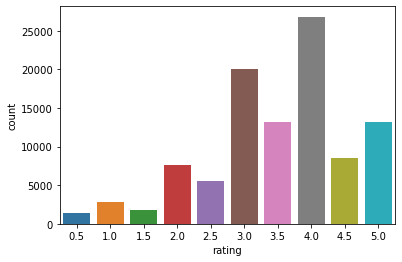

In [35]:
sns.countplot(x='rating',data=df_ratings)

In [36]:
df_ratings.groupby(by='rating').aggregate(func='mean')

,userId,movieId,year,month,day
rating,,,,,
0.5,334.536496,28267.988321,2011.632847,5.504380,15.221168
1.0,329.784063,14819.926361,2005.474208,6.495553,15.307008
1.5,376.597990,30537.082077,2011.608040,5.581798,15.761027
2.0,325.257714,15496.788108,2006.114952,6.477420,15.471328
2.5,363.685946,25686.934595,2011.347027,5.968468,16.331171
3.0,326.648775,14853.203173,2005.668679,6.504215,15.787300
3.5,337.152406,26388.434074,2010.649589,6.153091,15.452649
4.0,320.366321,17858.161496,2006.937878,6.565926,15.967522
4.5,315.131096,27504.881067,2011.001169,6.261373,15.615250


In [37]:
group=df_ratings.groupby(['userId', 'rating'])
group

<AxesSubplot:xlabel='year', ylabel='rating'>

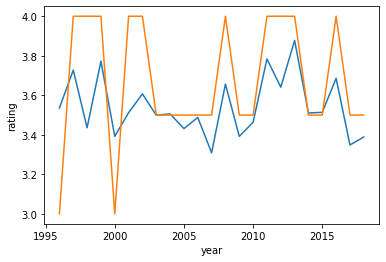

In [38]:
sns.lineplot(data = df_ratings.groupby(by='year').aggregate(func='mean'),x = 'year',y='rating')
sns.lineplot(data = df_ratings.groupby(by='year').aggregate(func='median'),x = 'year',y='rating')

In [39]:
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity


In [40]:
rating_counts = df_ratings[df_ratings['rating'].notnull()]['rating'].astype('int')
rating_averages = df_ratings[df_ratings['rating'].notnull()]['rating'].astype('int')
C = rating_averages.mean()
C

3.350827085564679

In [41]:
m = rating_counts.quantile(0.95)
m

5.0

In [42]:
qualified = df_ratings[df_ratings['rating'] >= m]
qualified['rating'] = qualified['rating'].astype('int')

qualified.shape

<ipython-input-42-659d97ebf2f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified['rating'] = qualified['rating'].astype('int')


(13211, 6)

In [43]:
#Changing the original ratings dataset 

df_ratings_top = df_ratings.sort_values('rating', ascending=False).head(250)

In [44]:
df_ratings_top

,userId,movieId,rating,year,month,day
34031,232,3147,5.0,2008,8,8
50717,328,1080,5.0,2017,5,8
18166,115,487,5.0,1999,12,11
18165,115,480,5.0,1999,12,11
76157,479,3308,5.0,2002,12,8
...,...,...,...,...,...,...
18054,113,2067,5.0,2001,1,24
50797,328,2788,5.0,2017,5,8
18050,113,1912,5.0,2001,1,21
76087,479,1220,5.0,2002,12,8


In [45]:
df_ratings

,userId,movieId,rating,year,month,day
0,1,1,4.0,2000,7,30
1,1,3,4.0,2000,7,30
2,1,6,4.0,2000,7,30
3,1,47,5.0,2000,7,30
4,1,50,5.0,2000,7,30
...,...,...,...,...,...,...
100831,610,166534,4.0,2017,5,3
100832,610,168248,5.0,2017,5,3
100833,610,168250,5.0,2017,5,8
100834,610,168252,5.0,2017,5,3


In [46]:
df_ratings['rating'] = df_ratings['rating'].astype('int')
df_ratings['userId'] = df_ratings['userId'].astype('int')
df_ratings['movieId'] = df_ratings['movieId'].astype('int')
df_ratings['year'] = df_ratings['year'].astype('int')
df_ratings['month'] = df_ratings['month'].astype('int')
df_ratings['day'] = df_ratings['day'].astype('int')

In [47]:
df_ratings

,userId,movieId,rating,year,month,day
0,1,1,4,2000,7,30
1,1,3,4,2000,7,30
2,1,6,4,2000,7,30
3,1,47,5,2000,7,30
4,1,50,5,2000,7,30
...,...,...,...,...,...,...
100831,610,166534,4,2017,5,3
100832,610,168248,5,2017,5,3
100833,610,168250,5,2017,5,8
100834,610,168252,5,2017,5,3


In [48]:
from sklearn.cluster import KMeans

# Merging the Datasets

In [49]:
df = pd.merge(df_movies,df_ratings,on='movieId')
df

,movieId,title,genres,userId,rating,year,month,day
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4,2000,7,30
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4,1996,11,8
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4,2005,1,25
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2,2017,11,13
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4,2011,5,18
...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4,2018,9,16
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3,2018,9,16
100833,193585,Flint (2017),Drama,184,3,2018,9,16
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3,2018,9,16


In [50]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Shogun Assassin (1980)                       5.0
Crossing Delancey (1988)                     5.0
Three from Prostokvashino (1978)             5.0
Karlson Returns (1970)                       5.0
Go for Zucker! (Alles auf Zucker!) (2004)    5.0
Name: rating, dtype: float64

In [51]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [52]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.0
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [53]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.0,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


# Visualization 

<AxesSubplot:>

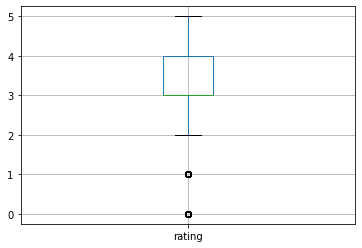

In [54]:
df[['rating']].boxplot()

C:\Users\Soham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

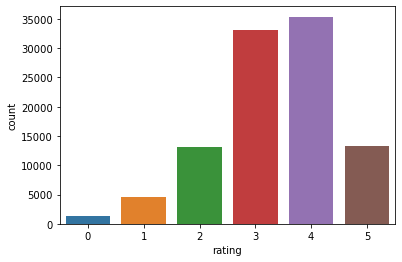

In [55]:
sns.countplot(df['rating'])

<AxesSubplot:>

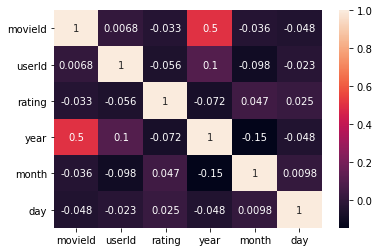

In [56]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

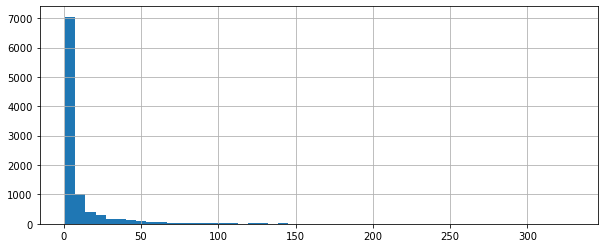

In [57]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=50)

<AxesSubplot:>

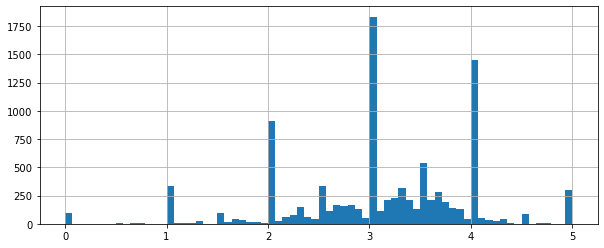

In [58]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

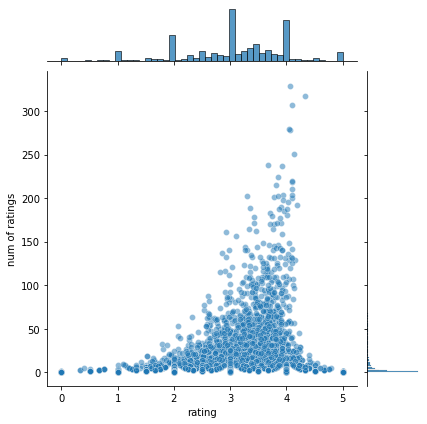

In [59]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# Recommending Similar Movies 
Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [60]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN


In [61]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.057751,329
"Shawshank Redemption, The (1994)",4.328076,317
Pulp Fiction (1994),4.097720,307
"Silence of the Lambs, The (1991)",4.053763,279
"Matrix, The (1999)",4.064748,278
Star Wars: Episode IV - A New Hope (1977),4.131474,251
Jurassic Park (1993),3.672269,238
Braveheart (1995),3.919831,237
Terminator 2: Judgment Day (1991),3.857143,224


In [62]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.057751,329
"Shawshank Redemption, The (1994)",4.328076,317
Pulp Fiction (1994),4.097720,307
"Silence of the Lambs, The (1991)",4.053763,279
"Matrix, The (1999)",4.064748,278
Star Wars: Episode IV - A New Hope (1977),4.131474,251
Jurassic Park (1993),3.672269,238
Braveheart (1995),3.919831,237
Terminator 2: Judgment Day (1991),3.857143,224


In [63]:
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.0,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [64]:
ForrestGump_user_ratings = moviemat['Forrest Gump (1994)']
PulpFiction_user_ratings = moviemat['Pulp Fiction (1994)']
ForrestGump_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [65]:
similar_to_ForrestGump = moviemat.corrwith(ForrestGump_user_ratings)
similar_to_PulpFiction = moviemat.corrwith(PulpFiction_user_ratings)

C:\Users\Soham\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Soham\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [66]:
corr_ForrestGump = pd.DataFrame(similar_to_ForrestGump,columns=['Correlation'])
corr_ForrestGump.dropna(inplace=True)
corr_ForrestGump.head()

,Correlation
title,
"'burbs, The (1989)",0.149445
(500) Days of Summer (2009),0.264628
*batteries not included (1987),0.707107
...And Justice for All (1979),0.866025
10 Cent Pistol (2015),-1.000000


In [67]:
corr_ForrestGump.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Pickpocket (1959),1.0
Poison Ivy: New Seduction (1997),1.0
Monster-in-Law (2005),1.0
Rock Star (2001),1.0
"Adventures of Pinocchio, The (1996)",1.0
Frankie and Johnny (1991),1.0
Carpool (1996),1.0
Heart Condition (1990),1.0
The Hitman's Bodyguard (2017),1.0


In [68]:
corr_ForrestGump = corr_ForrestGump.join(ratings['num of ratings'])
corr_ForrestGump.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.149445,17
(500) Days of Summer (2009),0.264628,42
*batteries not included (1987),0.707107,7
...And Justice for All (1979),0.866025,3
10 Cent Pistol (2015),-1.000000,2


In [69]:
corr_ForrestGump[corr_ForrestGump['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.495310,141
Aladdin (1992),0.452475,183
Braveheart (1995),0.434982,237
"Truman Show, The (1998)",0.423891,125


In [70]:

corr_PulpFiction = pd.DataFrame(similar_to_PulpFiction,columns=['Correlation'])
corr_PulpFiction.dropna(inplace=True)
corr_PulpFiction = corr_PulpFiction.join(ratings['num of ratings'])
corr_PulpFiction[corr_PulpFiction['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,307
Kill Bill: Vol. 1 (2003),0.547485,131
Fight Club (1999),0.498671,218
Trainspotting (1996),0.471021,102
Kill Bill: Vol. 2 (2004),0.437842,110


In [71]:
corrMatrix = moviemat.corr(method='pearson')
corrMatrix.head(100)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3 Ninjas (1992),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3 Ninjas Kick Back (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3 Ninjas Knuckle Up (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
  
    return similar_ratings

In [73]:

romantic_lover = [("(500) Days of Summer (2009)",5),("Alice in Wonderland (2010)",3),("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()
for movie,rating in romantic_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,NaN,NaN,NaN,NaN,NaN,NaN,2.362278,NaN,2.500000,2.165064e+00,...,NaN,-2.500000,NaN,NaN,NaN,-0.707107,1.931150,2.50,1.305582,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.336840,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.500000,0.100223,NaN,0.500000,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,-0.402761,NaN,-0.418876,-8.333333e-01,...,NaN,-0.512348,NaN,NaN,NaN,0.127309,-0.256854,0.75,0.557443,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,-0.014574,NaN,-0.077611,-5.551115e-17,...,NaN,-0.433013,NaN,NaN,NaN,0.134172,-0.057417,0.50,0.086268,NaN


In [74]:
similar_movies.sum().sort_values(ascending=False).head(20)

Fool's Gold (2008)                   5.000000
Magic Mike (2012)                    5.000000
Shame (2011)                         4.750000
Wanderlust (2012)                    4.712698
Revolver (2005)                      4.700315
For Richer or Poorer (1997)          4.688328
Love Guru, The (2008)                4.633847
Young Adult (2011)                   4.500000
The Spectacular Now (2013)           4.500000
Grass (1999)                         4.500000
Ariel (1988)                         4.500000
Hot Tub Time Machine 2 (2015)        4.500000
Stay Alive (2006)                    4.500000
Take Shelter (2011)                  4.500000
Ghosts of Girlfriends Past (2009)    4.500000
Wicker Park (2004)                   4.500000
Mighty Joe Young (1949)              4.500000
Goon (2011)                          4.500000
Push (2009)                          4.500000
Memories (Memorîzu) (1995)           4.500000
dtype: float64

In [75]:
action_lover = [("Amazing Spider-Man, The (2012)",5),("Mission: Impossible III (2006)",4),("Toy Story 3 (2010)",2),("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",4)]
similar_movies = pd.DataFrame()
for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(20)

Avengers, The (1998)                            5.750000
Solo: A Star Wars Story (2018)                  5.598076
Halloween: Resurrection (Halloween 8) (2002)    5.500000
Garfield: The Movie (2004)                      5.500000
Black Dahlia, The (2006)                        5.500000
Deliverance (1972)                              5.500000
Twin Peaks: Fire Walk with Me (1992)            5.417367
White Noise (2005)                              5.261469
Great Mouse Detective, The (1986)               5.250000
Spice World (1997)                              5.191637
Four Brothers (2005)                            5.187500
Walking Tall (2004)                             5.145833
Cursed (2005)                                   5.138916
Lockout (2012)                                  5.138034
Tremors II: Aftershocks (1996)                  5.122036
Mortal Kombat: Annihilation (1997)              5.052855
Ghosts of Mars (2001)                           5.049038
Detroit Rock City (1999)       

In [76]:
moviemat1 = df.pivot_table(index='userId',columns='title',values='rating').fillna(0)
moviemat1

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0


In [77]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [78]:
# transform matrix to scipy sparse matrix
user_to_movie_sparse_df = csr_matrix(moviemat1.values)
user_to_movie_sparse_df

<610x9719 sparse matrix of type '<class 'numpy.float64'>'
	with 99462 stored elements in Compressed Sparse Row format>

# Fitting K-Nearest Neighbours model to the scipy sparse matrix:

In [79]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [80]:
## function to find top n similar users of the given input user 
def get_similar_users(user, n = 5):
  ## input to this function is the user and number of top similar users you want.

  knn_input = np.asarray([moviemat1.values[user-1]])  #.reshape(1,-1)
  # knn_input = user_to_movie_df.iloc[0,:].values.reshape(1,-1)
  distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"users who are very much similar to the User-",user, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
  return indices.flatten()[1:] + 1, distances.flatten()[1:]

# Specify User id and Number of similar users we want to consider here

In [81]:
from pprint import pprint
user_id = 50
print(" Few of movies seen by the User:")
pprint(list(df[df['userId'] == user_id]['title'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)

 Few of movies seen by the User:
['Toy Story (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Taxi Driver (1976)',
 'Die Hard: With a Vengeance (1995)',
 'Pulp Fiction (1994)',
 'Shawshank Redemption, The (1994)',
 'Forrest Gump (1994)',
 'Blade Runner (1982)',
 'Silence of the Lambs, The (1991)',
 'Pinocchio (1940)']
Top 5 users who are very much similar to the User- 50 are: 
 
1 . User: 328 separated by distance of 0.7405454258202492
2 . User: 247 separated by distance of 0.7512170118423027
3 . User: 434 separated by distance of 0.7523936023211785
4 . User: 387 separated by distance of 0.7524734088011462
5 . User: 18 separated by distance of 0.7597246603191466


With the help of the KNN model built, we could get desired number of top similar users.

Now we will have to pick the top movies to recommend.

One way would be by taking the average of the existing ratings given by the similar users and picking the top 10 or 15 movies to recommend to our current user.

But I feel recommendation would be more effective if we define weights to ratings by each similar user based on the thier distance from the input user. Defining these weights would give us the accurate recommendations by eliminating the chance of decision manipulation by the users who are relatively very far from the input user.

In [82]:
similar_user_list, distance_list

(array([328, 247, 434, 387,  18], dtype=int64),
 array([0.74054543, 0.75121701, 0.7523936 , 0.75247341, 0.75972466]))

In [83]:
weightage_list = distance_list/np.sum(distance_list)
weightage_list

array([0.19714473, 0.19998567, 0.2002989 , 0.20032015, 0.20225054])

# Getting ratings of all movies by derived similar users

In [84]:
mov_rtngs_sim_users = moviemat1.values[similar_user_list]
mov_rtngs_sim_users

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 2., 0.]])

In [85]:
movies_list = moviemat1.columns
movies_list

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [86]:
print("Weightage list shape:", len(weightage_list))
print("mov_rtngs_sim_users shape:", mov_rtngs_sim_users.shape)
print("Number of movies:", len(movies_list))

Weightage list shape: 5
mov_rtngs_sim_users shape: (5, 9719)
Number of movies: 9719


# Broadcasting weightage matrix to similar user rating matrix. so that it gets compatible for matrix operations



In [87]:
weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
weightage_list.shape

(5, 9719)

In [88]:
new_rating_matrix = weightage_list*mov_rtngs_sim_users
mean_rating_list = new_rating_matrix.sum(axis =0)
mean_rating_list

array([0.        , 0.        , 0.        , ..., 0.        , 0.40450109,
       0.        ])

In [89]:
from pprint import pprint
def recommend_movies(n):
  n = min(len(mean_rating_list),n)
  # print(np.argsort(mean_rating_list)[::-1][:n])
  pprint(list(movies_list[np.argsort(mean_rating_list)[::-1][:n]]))

In [90]:
print("Movies recommended based on similar users are: ")
recommend_movies(10)

Movies recommended based on similar users are: 
["One Flew Over the Cuckoo's Nest (1975)",
 'Fight Club (1999)',
 'Princess Bride, The (1987)',
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) '
 '(1981)',
 'Indiana Jones and the Last Crusade (1989)',
 'Matrix, The (1999)',
 'Shrek (2001)',
 'Ice Age (2002)',
 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
 'Star Wars: Episode IV - A New Hope (1977)']


It had been observed that, this recommendation system built can be made more efficient as it has few drawbacks.

Drawbacks:

1. But this recommendation system has a drawback, it also recommends movies which are already seen by the given input User.

2. And also there is a possibility of recommending the movies which are not at all seen by any of the similar users.

Above drawbacks are addressed and a new recommender system with modification is built

Below function is defined to remove the movies which are already seen the current user and not at all seen by any of the similar users.

In [91]:
def filtered_movie_recommendations(n):
  
  first_zero_index = np.where(mean_rating_list == 0)[0][-1]
  sortd_index = np.argsort(mean_rating_list)[::-1]
  sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
  n = min(len(sortd_index),n)
  movies_watched = list(df[df['userId'] == user_id]['title'])
  filtered_movie_list = list(movies_list[sortd_index])
  count = 0
  final_movie_list = []
  for i in filtered_movie_list:
    if i not in movies_watched:
      count+=1
      final_movie_list.append(i)
    if count == n:
      break
  if count == 0:
    print("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
  else:
    pprint(final_movie_list)

In [92]:
filtered_movie_recommendations(10)

["One Flew Over the Cuckoo's Nest (1975)",
 'Princess Bride, The (1987)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'X-Men (2000)',
 'Gladiator (2000)',
 'Casper (1995)',
 'Lethal Weapon 3 (1992)',
 'Frequency (2000)',
 'My Cousin Vinny (1992)']


Coding up all of the above individual cells into a function.

Giving Input as User id, Number of similar Users to be considered, Number of top movie we want to recommend

In [93]:
from pprint import pprint

def recommender_system(user_id, n_similar_users, n_movies): #, user_to_movie_df, knn_model):
  
  print("Movie seen by the User:")
  pprint(list(df[df['userId'] == user_id]['title']))
  print("")

  # def get_similar_users(user, user_to_movie_df, knn_model, n = 5):
  def get_similar_users(user, n = 5):
    
    knn_input = np.asarray([moviemat1.values[user-1]])
    
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
    
    print("Top",n,"users who are very much similar to the User-",user, "are: ")
    print(" ")

    for i in range(1,len(distances[0])):
      print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
    print("")
    return indices.flatten()[1:] + 1, distances.flatten()[1:]


  def filtered_movie_recommendations(n = 10):
  
    first_zero_index = np.where(mean_rating_list == 0)[0][-1]
    sortd_index = np.argsort(mean_rating_list)[::-1]
    sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
    n = min(len(sortd_index),n)
    movies_watched = list(df[df['userId'] == user_id]['title'])
    filtered_movie_list = list(movies_list[sortd_index])
    count = 0
    final_movie_list = []
    for i in filtered_movie_list:
      if i not in movies_watched:
        count+=1
        final_movie_list.append(i)
      if count == n:
        break
    if count == 0:
      print("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
    else:
      pprint(final_movie_list)

  similar_user_list, distance_list = get_similar_users(user_id,n_similar_users)
  weightage_list = distance_list/np.sum(distance_list)
  mov_rtngs_sim_users = moviemat1.values[similar_user_list]
  movies_list = moviemat1.columns
  weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
  new_rating_matrix = weightage_list*mov_rtngs_sim_users
  mean_rating_list = new_rating_matrix.sum(axis =0)
  print("")
  print("Movies recommended based on similar users are: ")
  print("")
  filtered_movie_recommendations(n_movies)

In [94]:
print("Enter user id")
user_id= int(input())
print("number of similar users to be considered")
sim_users = int(input())
print("Enter number of movies to be recommended:")
n_movies = int(input())
recommender_system(user_id,sim_users,n_movies)
# recommender_system(300, 15,15)

Enter user id
5
number of similar users to be considered
5
Enter number of movies to be recommended:
5
Movie seen by the User:
['Toy Story (1995)',
 'Get Shorty (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'Clueless (1995)',
 'Usual Suspects, The (1995)',
 'Postman, The (Postino, Il) (1994)',
 'Braveheart (1995)',
 'Apollo 13 (1995)',
 'Batman Forever (1995)',
 'Eat Drink Man Woman (Yin shi nan nu) (1994)',
 'Heavenly Creatures (1994)',
 'Interview with the Vampire: The Vampire Chronicles (1994)',
 'Little Women (1994)',
 'Like Water for Chocolate (Como agua para chocolate) (1992)',
 'Legends of the Fall (1994)',
 'Once Were Warriors (1994)',
 'Pulp Fiction (1994)',
 'Quiz Show (1994)',
 'Stargate (1994)',
 'Shawshank Redemption, The (1994)',
 'Ace Ventura: Pet Detective (1994)',
 'Clear and Present Danger (1994)',
 'Four Weddings and a Funeral (1994)',
 'Lion King, The (1994)',
 'Mask, The (1994)',
 'True Lies (1994)',
 'Addams Family Values (1993)',
 'Fugitive, The (1993)',


# Movie Recommendation using KNN with Input as Movie Name and Number of movies you want to get recommended:

1. Reshaping model in such a way that each movie has n-dimensional rating space where n is total number of users who could rate.

We will train the KNN model inorder to find the closely matching similar movies to the movie we give as input and we recommend the top movies which would more closely align to the movie we have given.

In [95]:
moviemat2 = df.pivot_table(index='title',columns='userId',values='rating').fillna(0)
moviemat2

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
movie_to_user_sparse_df = csr_matrix(moviemat2.values)
movie_to_user_sparse_df

<9719x610 sparse matrix of type '<class 'numpy.float64'>'
	with 99462 stored elements in Compressed Sparse Row format>

In [97]:
movies_list = list(moviemat2.index)
movies_list[:10]

["'71 (2014)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'Round Midnight (1986)",
 "'Salem's Lot (2004)",
 "'Til There Was You (1997)",
 "'Tis the Season for Love (2015)",
 "'burbs, The (1989)",
 "'night Mother (1986)",
 '(500) Days of Summer (2009)',
 '*batteries not included (1987)']

Creating a dictionary with movie name as key and its index from the list as value:

In [98]:
movie_dict = {movie : index for index, movie in enumerate(movies_list)}
print(movie_dict)

{"'71 (2014)": 0, "'Hellboy': The Seeds of Creation (2004)": 1, "'Round Midnight (1986)": 2, "'Salem's Lot (2004)": 3, "'Til There Was You (1997)": 4, "'Tis the Season for Love (2015)": 5, "'burbs, The (1989)": 6, "'night Mother (1986)": 7, '(500) Days of Summer (2009)': 8, '*batteries not included (1987)': 9, '...All the Marbles (1981)': 10, '...And Justice for All (1979)': 11, '00 Schneider - Jagd auf Nihil Baxter (1994)': 12, '1-900 (06) (1994)': 13, '10 (1979)': 14, '10 Cent Pistol (2015)': 15, '10 Cloverfield Lane (2016)': 16, '10 Items or Less (2006)': 17, '10 Things I Hate About You (1999)': 18, '10 Years (2011)': 19, '10,000 BC (2008)': 20, '100 Girls (2000)': 21, '100 Streets (2016)': 22, '101 Dalmatians (1996)': 23, '101 Dalmatians (One Hundred and One Dalmatians) (1961)': 24, "101 Dalmatians II: Patch's London Adventure (2003)": 25, '101 Reykjavik (101 Reykjavík) (2000)': 26, '102 Dalmatians (2000)': 27, '10th & Wolf (2006)': 28, '10th Kingdom, The (2000)': 29, '10th Victim,

In [99]:
case_insensitive_movies_list = [i.lower() for i in movies_list]

# Fitting a KNN model:

In [100]:
knn_movie_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_movie_model.fit(movie_to_user_sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [101]:
## function to find top n similar users of the given input user 
def get_similar_movies(movie, n = 10):
  ## input to this function is the movie and number of top similar movies you want.
  index = movie_dict[movie]
  knn_input = np.asarray([moviemat2.values[index]])
  n = min(len(movies_list)-1,n)
  distances, indices = knn_movie_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"movies which are very much similar to the Movie-",movie, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(movies_list[indices[0][i]])

Testing the recommender system with basic input with the movie names

In [102]:
from pprint import pprint
movie_name = '101 Dalmatians (1996)'

get_similar_movies(movie_name,15)

Top 15 movies which are very much similar to the Movie- 101 Dalmatians (1996) are: 
 
Jack (1996)
Matilda (1996)
Dumbo (1941)
Hunchback of Notre Dame, The (1996)
Willy Wonka & the Chocolate Factory (1971)
Space Jam (1996)
George of the Jungle (1997)
Peter Pan (1953)
James and the Giant Peach (1996)
Mary Poppins (1964)
Dracula: Dead and Loving It (1995)
Mars Attacks! (1996)
Toy Story (1995)
Cool Runnings (1993)
Father of the Bride Part II (1995)


Dynamically suggesting movie name from the existing movie corpus we have, based on the user input using try and except architecture.

Defining a function which outputs movie names as suggestion when the user mis spells the movie name. User might have intended to type any of these movie names.

In [103]:
# function which takes input and returns suggestions for the user

def get_possible_movies(movie):

    temp = ''
    possible_movies = case_insensitive_movies_list.copy()
    for i in movie :
      out = []
      temp += i
      for j in possible_movies:
        if temp in j:
          out.append(j)
      if len(out) == 0:
          return possible_movies
      out.sort()
      possible_movies = out.copy()

    return possible_movies

This function provides user with movie name suggestions if movie name is mis-spelled or Recommends similar movies to the input movie if the movie name is valid.

In [104]:
class invalid(Exception):
    pass

def spell_correction():
    
    try:

      movie_name = input("Enter the Movie name: ")
      movie_name_lower = movie_name.lower()
      if movie_name_lower not in case_insensitive_movies_list :
        raise invalid
      else :
        # movies_list[case_insensitive_country_names.index(movie_name_lower)]
        num_recom = int(input("Enter Number of movie recommendations needed: "))
        get_similar_movies(movies_list[case_insensitive_movies_list.index(movie_name_lower)],num_recom)

    except invalid:

      possible_movies = get_possible_movies(movie_name_lower)

      if len(possible_movies) == len(movies_list) :
        print("Movie name entered is does not exist in the list ")
      else :
        indices = [case_insensitive_movies_list.index(i) for i in possible_movies]
        print("Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :\n",[movies_list[i] for i in indices])
        spell_correction()

In [105]:
spell_correction()

Enter the Movie name: Toy Story
Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :
 ['Toy Story (1995)', 'Toy Story 2 (1999)', 'Toy Story 3 (2010)']
Enter the Movie name: jumanji
Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :
 ['Jumanji (1995)', 'Jumanji: Welcome to the Jungle (2017)']
Enter the Movie name: abc
Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :
 ['ABCs of Death, The (2012)']
Enter the Movie name: Elysium (2013)
Enter Number of movie recommendations needed: 5
Top 5 movies which are very much similar to the Movie- Elysium (2013) are: 
 
Pacific Rim (2013)
Surrogates (2009)
Expendables 2, The (2012)
Real Steel (2011)
Expendables, The (2010)


Observation on above built KNN Recommender System:

An interesting observation would be that the above KNN model for movies recommends movies that are produced in very similar years of the input movie. However, the cosine distance of all those recommendations are observed to be actually quite small. This might be because there are too many zero values in our movie-user matrix. With too many zero values in our data, the data sparsity becomes a real issue for KNN model and the distance in KNN model starts to fall apart. So I'd like to dig deeper and look closer inside our data.

Let's now look at how sparse the movie-user matrix is by calculating percentage of zero values in the data.

In [106]:
# calcuate total number of entries in the movie-user matrix
num_entries = moviemat2.shape[0] * moviemat2.shape[1]
# calculate total number of entries with zero values
num_zeros = (moviemat2==0).sum(axis=1).sum()
# calculate ratio of number of zeros to number of entries
ratio_zeros = num_zeros / num_entries
print('There is about {:.2%} of ratings in our data is missing'.format(ratio_zeros))

There is about 98.32% of ratings in our data is missing


There is about 93.65% of ratings in our data is missing
This result confirms the above hypothesis. The vast majority of entries in our data is zero. This explains why the distance between similar items or opposite items are both pretty large.